# Analyze the LASSO regression performance

- Inputs: LASSO coefficients from the 3 * 3 regressions.
- Analyzing the performance, key coefficients, etc.


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

# regression tools
import statsmodels.api as sm
from sklearn.preprocessing import normalize


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
with open('../../data/05_model_outputs/lasso_performance.pickle', 'rb') as f:
    performance_dic = pickle.load(f)
    
with open('../../data/05_model_outputs/lasso_coefficients.pickle', 'rb') as f:
    coeff_dic = pickle.load(f)
    

In [3]:
# save locations
fig_location = '../../../economic-strength-of-weak-mobility-ties-paper-/figs/'
table_location = '../../../economic-strength-of-weak-mobility-ties-paper-/tables/'


#### Obtain the key mobility ties (activities)

In [4]:
# Export all the important activities
import itertools

city_list = ['boston', 'chicago', 'miami', 'nyc']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 
               'rent_median_2018']

### 
coeff_dic_for_df = {}

# pd.DataFrame(np.zeros((15, 3*3)), 
#                         columns = list(itertools.product(city_list, output_list)))

for city in city_list:
    for output in output_list:
        print(city, output)
        coeff_dic_for_df[(city, output)] = copy.copy(coeff_dic[city][output]['lasso (no socio-demographics)'])
        coeff_dic_for_df[(city, output)] = coeff_dic_for_df[(city, output)].reset_index()
        

boston inc_median_household_2018
boston property_value_median_2018
boston rent_median_2018
chicago inc_median_household_2018
chicago property_value_median_2018
chicago rent_median_2018
miami inc_median_household_2018
miami property_value_median_2018
miami rent_median_2018
nyc inc_median_household_2018
nyc property_value_median_2018
nyc rent_median_2018


In [5]:
pd.set_option('display.max_columns', 500)
coeff_dic_df = pd.concat(coeff_dic_for_df, axis = 1)
coeff_dic_df.index += 1
coeff_dic_df

boston                                                 \
   inc_median_household_2018           property_value_median_2018             
                       index     value                      index     value   
1             Latin American -0.052719             Discount Store -0.045884   
2                  Caribbean -0.047442          Convenience Store -0.042458   
3                  Brazilian -0.033213                   Hot Dogs -0.032983   
4              Fried Chicken -0.026100                 Car Washes -0.029239   
5                 Laundromat -0.020124             Latin American -0.026444   
6                 Food Stand  0.022041                     Tattoo -0.024189   
7               Tennis Court  0.022838                  Brazilian -0.022922   
8              Fishing Store  0.024188                Video Games -0.021531   
9                   Football  0.024686                 Strip Club -0.021167   
10            Science Museum  0.027285                 Art Museum  0.023082   
11                  Ski Area  0.028614                  Locksmith  0.025664   
12               Peking Duck  0.039055                     Bagels  0.028036   
13                  Cupcakes  0.042785               Cycle Studio  0.071260   
14              Skating Rink  0.062328                      Salad  0.083690   
15                    French  0.077346                     French  0.098779   

                                                 chicago            \
    rent_median_2018           inc_median_household_2018             
               index     value                     index     value   
1   Thrift / Vintage -0.021420            Discount Store -0.075285   
2        Pet Service -0.020264                 Caribbean -0.037931   
3          Caribbean -0.013465     Check Cashing Service -0.023629   
4           Hot Dogs -0.012142                Laundromat -0.013066   
5            Spanish -0.011805                Basketball  0.011197   
6            Storage -0.008046                   Volcano  0.013246   
7     Indian Chinese  0.007915                    Kosher  0.015703   
8            Noodles  0.010422            Pilates Studio  0.018776   
9        Engineering  0.012647            Kitchen Supply  0.026679   
10         Gastropub  0.014216              Skating Rink  0.037587   
11        University  0.015297                    Bagels  0.048831   
12         Synagogue  0.015579              New American  0.050781   
13    Sorority House  0.015651                    French  0.056830   
14        Art Museum  0.032275                    Hockey  0.058820   
15            French  0.053463               Golf Course  0.087332   

                                                                             \
   property_value_median_2018                    rent_median_2018             
                        index     value                     index     value   
1              Discount Store -0.159125            Discount Store -0.022832   
2                        Food -0.053095     Check Cashing Service -0.020628   
3                   Pawn Shop -0.036316                Laundromat -0.019881   
4                      Buffet -0.027311  Grilled Meat Restaurants  0.008300   
5                   Caribbean -0.023099              North Indian  0.008355   
6              Pilates Studio  0.011978         Recreation Center  0.009067   
7                Climbing Gym  0.013067            Kitchen Supply  0.009529   
8                Tennis Court  0.015707              Tennis Court  0.011599   
9                 Yoga Studio  0.019551             Travel Agency  0.015356   
10                    Gourmet  0.024067                Basketball  0.015599   
11                     Hockey  0.038779               Golf Course  0.016951   
12                     Kosher  0.044662                    French  0.017848   
13                Curling Ice  0.048627                    Kosher  0.026083   
14               New American  0.092229                    Bagels  0.04756

In [6]:
coeff_dic_df['chicago'][('inc_median_household_2018', 'index')].values[::-1]

array(['Golf Course', 'Hockey', 'French', 'New American', 'Bagels',
       'Skating Rink', 'Kitchen Supply', 'Pilates Studio', 'Kosher',
       'Volcano', 'Basketball', 'Laundromat', 'Check Cashing Service',
       'Caribbean', 'Discount Store'], dtype=object)

In [7]:
coeff_dic_df['chicago'][('property_value_median_2018', 'index')].values[::-1]

array(['French', 'New American', 'Curling Ice', 'Kosher', 'Hockey',
       'Gourmet', 'Yoga Studio', 'Tennis Court', 'Climbing Gym',
       'Pilates Studio', 'Caribbean', 'Buffet', 'Pawn Shop', 'Food',
       'Discount Store'], dtype=object)

In [8]:
coeff_dic_df['chicago'][('rent_median_2018', 'index')].values[::-1]

array(['New American', 'Bagels', 'Kosher', 'French', 'Golf Course',
       'Basketball', 'Travel Agency', 'Tennis Court', 'Kitchen Supply',
       'Recreation Center', 'North Indian', 'Grilled Meat Restaurants',
       'Laundromat', 'Check Cashing Service', 'Discount Store'],
      dtype=object)

#### Obtain the key mobility ties (activities) & sociodemographic variables

In [9]:
# Export all the important activities
import itertools

city_list = ['boston', 'chicago', 'miami', 'nyc']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 
               'rent_median_2018']

### 
coeff_dic_with_socio_for_df = {}

# pd.DataFrame(np.zeros((15, 3*3)), 
#                         columns = list(itertools.product(city_list, output_list)))

for city in city_list:
    for output in output_list:
        print(city, output)
        coeff_dic_with_socio_for_df[(city, output)] = copy.copy(coeff_dic[city][output]['lasso (with socio-demographics)'])
        coeff_dic_with_socio_for_df[(city, output)] = coeff_dic_with_socio_for_df[(city, output)].reset_index()
        

boston inc_median_household_2018
boston property_value_median_2018
boston rent_median_2018
chicago inc_median_household_2018
chicago property_value_median_2018
chicago rent_median_2018
miami inc_median_household_2018
miami property_value_median_2018
miami rent_median_2018
nyc inc_median_household_2018
nyc property_value_median_2018
nyc rent_median_2018


In [10]:
coeff_with_socio_dic_df = pd.concat(coeff_dic_with_socio_for_df, axis = 1)
coeff_with_socio_dic_df.index += 1
coeff_with_socio_dic_df

boston                                                 \
    inc_median_household_2018           property_value_median_2018             
                        index     value                      index     value   
1            pop_density_2016 -0.114354          Business Services -0.032764   
2                      Shrine -0.021081                    Tex-Mex -0.029262   
3                      Castle -0.018648             Animal Shelter -0.028918   
4                   Himalayan -0.016375                Video Games -0.027172   
5               Fishing Store  0.015679                 Strip Club -0.019325   
6                    Ski Area  0.016568                        Zoo -0.017598   
7            Meze Restaurants  0.017375                Sports Club  0.018568   
8                 Sports Club  0.017825                   Wine Bar  0.019554   
9                      Soccer  0.017893                      Pitch  0.021053   
10                Peking Duck  0.018637                Cheese Shop  0.021053   
11                   Cupcakes  0.031568                  Locksmith  0.026452   
12                 Food Stand  0.032439                      Salad  0.054586   
13               Skating Rink  0.035528               Cycle Studio  0.055322   
14                     French  0.049460                     French  0.060720   
15  edu_higher_edu_ratio_2016  0.498983  edu_higher_edu_ratio_2016  0.428935   

                                                           chicago            \
             rent_median_2018            inc_median_household_2018             
                        index     value                      index     value   
1                 Pet Service -0.027429           pop_density_2016 -0.086249   
2            Thrift / Vintage -0.017039                  Caribbean -0.015786   
3          Golf Driving Range -0.016044               Scandinavian -0.007298   
4                       Canal -0.010460   Grilled Meat Restaurants  0.004708   
5                  University  0.010319          Recreation Center  0.005728   
6              Sorority House  0.010775                     French  0.009316   
7                 Engineering  0.010816                    Volcano  0.009369   
8                  Art Museum  0.010837                     Kosher  0.011331   
9              Medical School  0.011349                Curling Ice  0.011695   
10                 Street Art  0.012742                Sports Club  0.014822   
11                        Lab  0.013834               Skating Rink  0.015570   
12                  Synagogue  0.020110                     Hockey  0.022339   
13             Indian Chinese  0.023053                Golf Course  0.043630   
14                     French  0.027693      race_white_ratio_2016  0.138684   
15  edu_higher_edu_ratio_2016  0.264226  edu_higher_edu_ratio_2016  0.472731   

                                                                              \
   property_value_median_2018                     rent_median_2018             
                        index     value                      index     value   
1                      Buffet -0.042879           pop_density_2016 -0.007512   
2                   Caribbean -0.041693                  Taiwanese -0.000976   
3                Credit Union -0.033490                 Basketball  0.000018   
4                Scandinavian -0.016726                  Preschool  0.001386   
5                  Conference -0.011916   Grilled Meat Restaurants  0.003273   
6                     Village -0.010919                 Conference  0.003493   
7                        Food -0.010009           Christmas Market  0.006947   
8                  Bike Trail  0.008878          Recreation Center  0.009238   
9              Latin American  0.009422               North Indian  0.011877   
10                      Cuban  0.013291                Golf Course  0.012862   
11                     French  0.038659              Travel Agency  0.013054   
12                   

## Saving the coefficient tables

In [40]:
# mobility only coefficients
for city in ['boston', 'chicago', 'miami', 'nyc']:
    with open(table_location+city+'_mobility_only_coeff.tex', 'w') as f:
        f.write(coeff_dic_df[city].to_latex())
    

In [41]:
# mobility + socio coefficients
for city in ['boston', 'chicago', 'miami', 'nyc']:
    with open(table_location+city+'_mobility_socio_coeff.tex', 'w') as f:
        f.write(coeff_with_socio_dic_df[city].to_latex())
    

## Analyzing the top performances

In [11]:
import itertools

top_performance_dic = {}
city_list = ['boston', 'chicago', 'miami', 'nyc']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
perform_category_list = ['baseline', 'lasso (no socio-demographics)', 'lasso (with socio-demographics)']

for city in city_list:
    top_performance_dic[city] = {}
    for output in output_list:
        for perform_category in perform_category_list:
            if perform_category == 'baseline':
                top_performance_dic[city][(output, perform_category)] = performance_dic[city][output][perform_category]
                
            else:
                max_col = np.argmax(performance_dic[city][output][perform_category].loc['testing',:])
                top_performance_dic[city][(output, perform_category)] = performance_dic[city][output][perform_category].iloc[:, max_col]
            

In [12]:
pd.concat(top_performance_dic['boston'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         1e-05   
training                        0.657                      0.662944   
testing                         0.647                      0.511138   
coef counts                     8.000                     53.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      1e-05                   baseline   
training                           0.748768                      0.610   
testing                            0.673873                      0.542   
coef counts                       20.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    1e-05                           5e-06   
training                         0.736076                        0.832544   
testing                          0.548133                        0.632311   
coef counts                     57.000000                       76.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         2e-05   
training               0.383                      0.303447   
testing                0.272                      0.175208   
coef counts            8.000                     13.000000   

                                             
            lasso (with socio-demographics)  
                                      2e-05  
training                           0.372606  
testing                            0.280838  
coef counts                        5.000000

In [13]:
pd.concat(top_performance_dic['chicago'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         5e-06   
training                        0.716                      0.633444   
testing                         0.702                      0.545771   
coef counts                     8.000                     48.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      5e-06                   baseline   
training                           0.746204                      0.630   
testing                            0.710852                      0.621   
coef counts                       23.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    5e-06                           5e-06   
training                         0.620760                        0.710028   
testing                          0.529977                        0.672314   
coef counts                     63.000000                       30.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         2e-06   
training               0.417                      0.509962   
testing                0.435                      0.318822   
coef counts            8.000                     49.000000   

                                             
            lasso (with socio-demographics)  
                                      5e-06  
training                           0.465512  
testing                            0.443328  
coef counts                        8.000000

In [14]:
pd.concat(top_performance_dic['miami'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         5e-06   
training                        0.660                      0.745158   
testing                         0.574                      0.421818   
coef counts                     8.000                     92.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      5e-06                   baseline   
training                           0.803404                      0.497   
testing                            0.562708                      0.455   
coef counts                       50.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    1e-05                           1e-05   
training                         0.623109                        0.677154   
testing                          0.334825                        0.468405   
coef counts                     86.000000                       62.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         1e-05   
training               0.429                      0.514653   
testing                0.384                      0.277484   
coef counts            8.000                     36.000000   

                                             
            lasso (with socio-demographics)  
                                      1e-05  
training                           0.547211  
testing                            0.412846  
coef counts                       21.000000

In [15]:
pd.concat(top_performance_dic['nyc'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         1e-06   
training                        0.674                      0.591902   
testing                         0.686                      0.504030   
coef counts                     8.000                     55.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      1e-06                   baseline   
training                           0.756055                      0.388   
testing                            0.715352                      0.379   
coef counts                       23.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    1e-06                           1e-06   
training                         0.509726                        0.569405   
testing                          0.382647                        0.473355   
coef counts                     75.000000                       57.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         1e-06   
training               0.334                      0.267309   
testing                0.331                      0.257303   
coef counts            8.000                     19.000000   

                                             
            lasso (with socio-demographics)  
                                      1e-07  
training                           0.515975  
testing                            0.443807  
coef counts                       57.000000

## Export the prediction power table using only mobility networks

In [16]:
# create a table reporting only the lasso (no socio-demographics) performance.
mobility_network_performance_dic = {}
output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
city_list = ['boston', 'chicago', 'miami']

for output in output_list:
    mobility_network_performance_dic[output] = {}
    for city in city_list:
        mobility_network_performance_dic[output][city] = top_performance_dic[city][(output, 'lasso (no socio-demographics)')]
        mobility_network_performance_dic[output][city]['training'] = np.round_(mobility_network_performance_dic[output][city]['training'], decimals=4)
        mobility_network_performance_dic[output][city]['testing'] = np.round_(mobility_network_performance_dic[output][city]['testing'], decimals=4)
        mobility_network_performance_dic[output][city]['coef counts'] = int(mobility_network_performance_dic[output][city]['coef counts'])
        
for output in output_list:
    mobility_network_performance_dic[output] = pd.concat(mobility_network_performance_dic[output], axis = 1)
    

In [17]:
mobility_network_performance_df = pd.concat(mobility_network_performance_dic, axis = 0)
mobility_network_performance_df


boston  chicago    miami
inc_median_household_2018  training      0.6629   0.6334   0.7452
                           testing       0.5111   0.5458   0.4218
                           coef counts  53.0000  48.0000  92.0000
property_value_median_2018 training      0.7361   0.6208   0.6231
                           testing       0.5481   0.5300   0.3348
                           coef counts  57.0000  63.0000  86.0000
rent_median_2018           training      0.3034   0.5100   0.5147
                           testing       0.1752   0.3188   0.2775
                           coef counts  13.0000  49.0000  36.0000

In [18]:
list(mobility_network_performance_df.loc[('inc_median_household_2018','training'),])

[0.6629, 0.6334, 0.7452]

In [19]:
# visualize this table. 
performance_df_for_visual = pd.DataFrame({
    'r2':list(mobility_network_performance_df.loc[('inc_median_household_2018','training'),])+\
    list(mobility_network_performance_df.loc[('inc_median_household_2018','testing'),])+\
    list(mobility_network_performance_df.loc[('property_value_median_2018','training'),])+\
    list(mobility_network_performance_df.loc[('property_value_median_2018','testing'),])+\
    list(mobility_network_performance_df.loc[('rent_median_2018','training'),])+\
    list(mobility_network_performance_df.loc[('rent_median_2018','testing'),]),
    'city':['boston','chicago','miami']*6,
    'output':['Income']*6 + ['Property Values']*6 + ['Rents']*6, 
    'train_test':['train','train','train','test','test','test']*3
})

performance_df_for_visual


,r2,city,output,train_test
0,0.6629,boston,Income,train
1,0.6334,chicago,Income,train
2,0.7452,miami,Income,train
3,0.5111,boston,Income,test
4,0.5458,chicago,Income,test
5,0.4218,miami,Income,test
6,0.7361,boston,Property Values,train
7,0.6208,chicago,Property Values,train
8,0.6231,miami,Property Values,train
9,0.5481,boston,Property Values,test


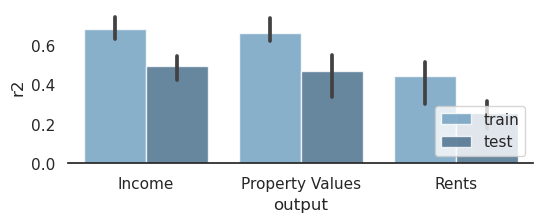

In [20]:
# 
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize = (6,2))
ax = sns.barplot(x="output", y="r2", hue="train_test", data=performance_df_for_visual, 
                palette='Blues_d', alpha = 0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc='lower right')
plt.show()


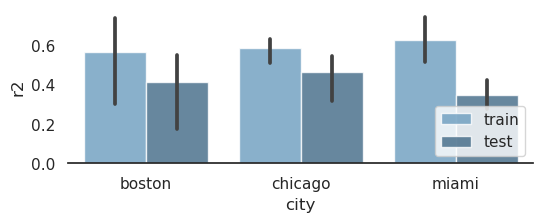

In [21]:
# 
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize = (6,2))
ax = sns.barplot(x="city", y="r2", hue="train_test", data=performance_df_for_visual, 
                palette='Blues_d', alpha = 0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc='lower right')
plt.show()


## Save

In [22]:
with open(table_location+'performance_mobility_table.tex', 'w') as f:
    f.write(mobility_network_performance_df.to_latex())


## Export the prediction power table using combined sociodemographics and mobility networks

In [24]:
performance_mobility_network_sociodemo_dic = {}
output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
city_list = ['boston', 'chicago', 'miami']

for output in output_list:
    performance_mobility_network_sociodemo_dic[output] = {}
    for city in city_list:
        performance_mobility_network_sociodemo_dic[output][city] = top_performance_dic[city][(output, 'lasso (with socio-demographics)')]
        performance_mobility_network_sociodemo_dic[output][city]['training'] = np.round_(performance_mobility_network_sociodemo_dic[output][city]['training'], decimals=4)
        performance_mobility_network_sociodemo_dic[output][city]['testing'] = np.round_(performance_mobility_network_sociodemo_dic[output][city]['testing'], decimals=4)
        performance_mobility_network_sociodemo_dic[output][city]['coef counts'] = int(performance_mobility_network_sociodemo_dic[output][city]['coef counts'])
        
for output in output_list:
    performance_mobility_network_sociodemo_dic[output] = pd.concat(performance_mobility_network_sociodemo_dic[output], axis = 1)


In [25]:
performance_mobility_network_sociodemo_df = pd.concat(performance_mobility_network_sociodemo_dic, axis = 0)
performance_mobility_network_sociodemo_df


boston  chicago    miami
inc_median_household_2018  training      0.7488   0.7462   0.8034
                           testing       0.6739   0.7109   0.5627
                           coef counts  20.0000  23.0000  50.0000
property_value_median_2018 training      0.8325   0.7100   0.6772
                           testing       0.6323   0.6723   0.4684
                           coef counts  76.0000  30.0000  62.0000
rent_median_2018           training      0.3726   0.4655   0.5472
                           testing       0.2808   0.4433   0.4128
                           coef counts   5.0000   8.0000  21.0000

## Save

In [26]:
with open(table_location+'performance_mobility_socio_table.tex', 'w') as f:
    f.write(performance_mobility_network_sociodemo_df.to_latex())


# Visualizing performance and coefficient counts

In [27]:
def plot_multiple_lines_ax(legend_names, x_base, x_label, d1, d2, d3, title, max_testing_R2, figname):
    # overall style
    # d1, d2: two plots on ax1
    # d3: counts on ax2
    # max_testing_R2: annotation.
    plt.style.use('ggplot') # set the style; or "ggplot", "dark_background", "classic";
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax2 = ax.twinx()
    
    # ax
    ax.plot(x_base, d1, 'o-', label = legend_names[0], linewidth = 3, markersize = 10, alpha = 0.8)
    ax.plot(x_base, d2, 'o-', label = legend_names[1], linewidth = 3, markersize = 10, alpha = 0.8)
    ax.set_title(title)
    ax.set(xlabel = 'X', ylabel = "Y")
        
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(20)
    ax.yaxis.label.set_fontsize(20)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.legend(loc = 1, fontsize = 20, title = None) # remove the legend title of "City_province"
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel("Alpha (regularization)")
    ax.set_ylabel("R2")
    ax.set_xticklabels(x_label)    

    # add ax annotation
    ax.annotate("Max R2 (Testing)="+str(max_testing_R2), 
                xy=(-0.5, 0.05), xycoords = 'data',
                xytext=(-0.5, 0.05), textcoords = 'data',
                size = 20)
    
    # ax2    
    ax2.bar(x_base, d3, alpha = 0.4)
    for c in ax2.containers:
        ax2.bar_label(c, size = 20)
    ax2.set_ylabel("Non-Zero Coefficient Counts")
    ax2.yaxis.label.set_fontsize(20)
    for item in (ax2.get_yticklabels()):
        item.set_fontsize(20)
        
        
    plt.tight_layout()
    plt.show()
    
    fig.savefig(fig_location + figname + '.png')

#     ax.set_xticks([2001, 2007, 2014]); 



In [28]:
list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].columns[3:])

[5e-06, 1e-05, 2e-05, 5e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

### LASSO regression performance in SI

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


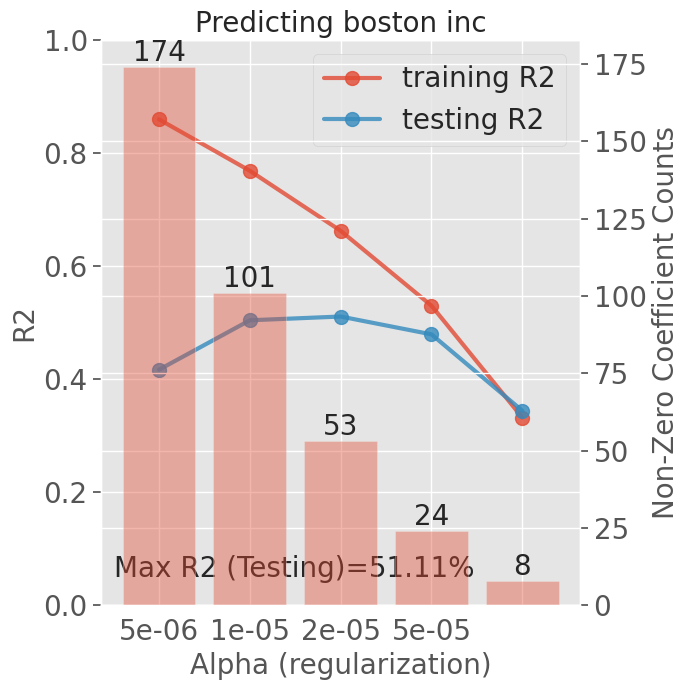

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


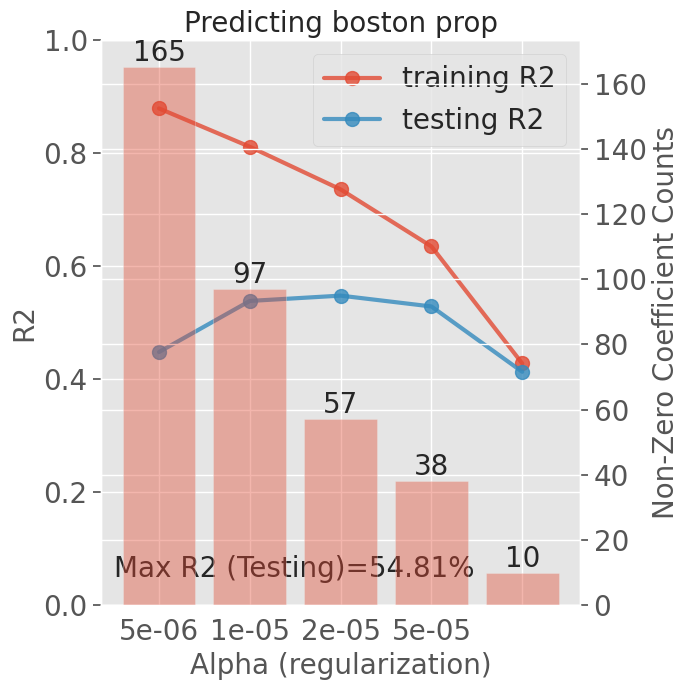

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


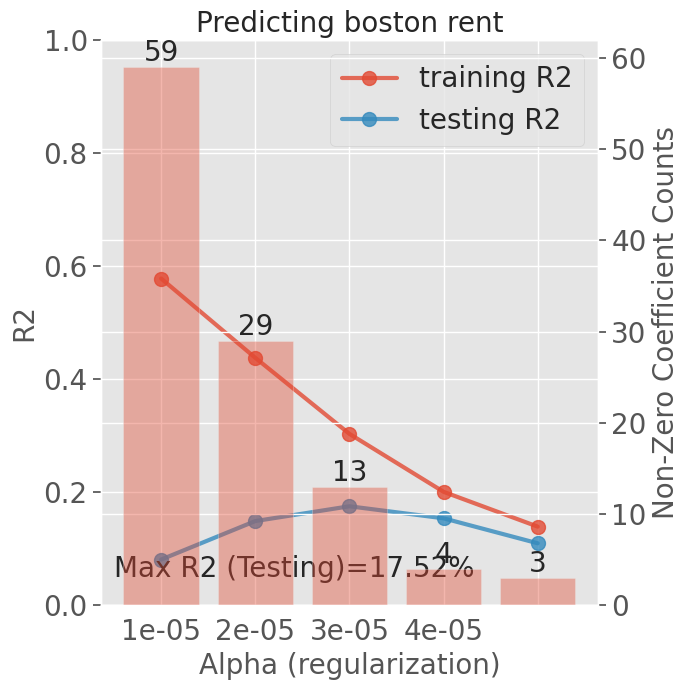

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


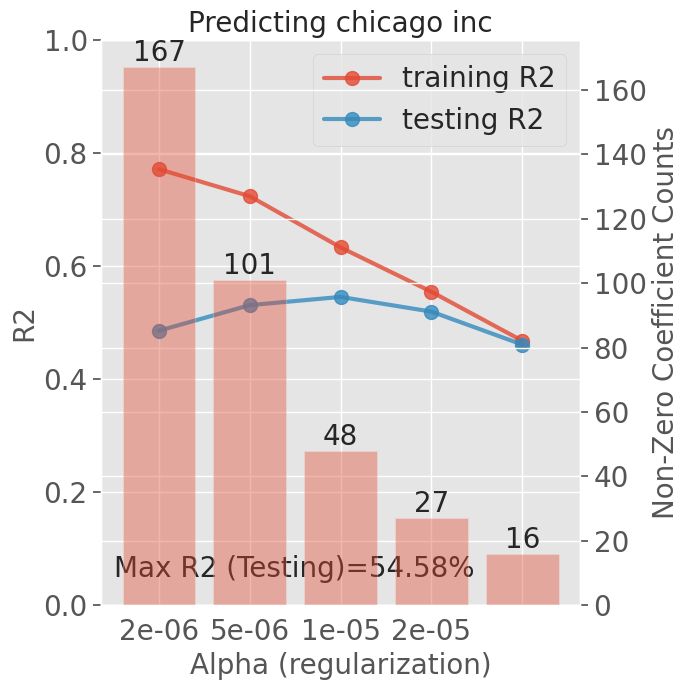

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


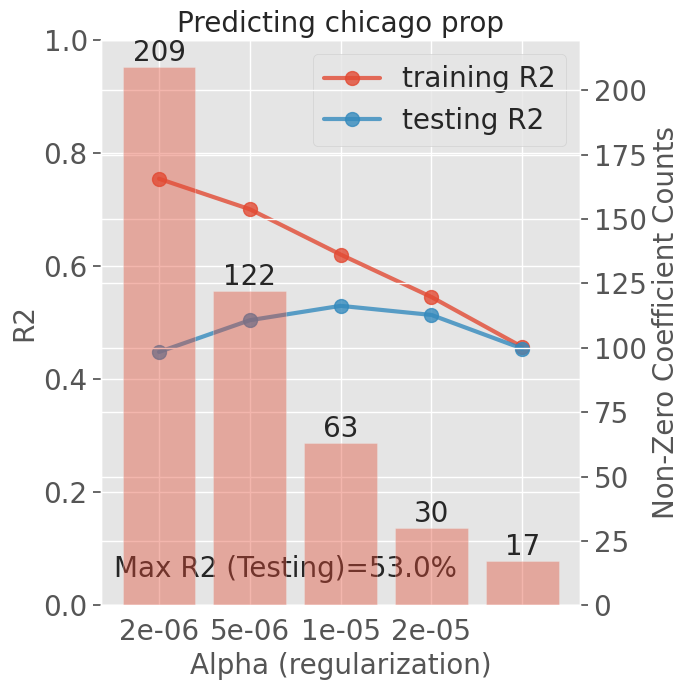

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


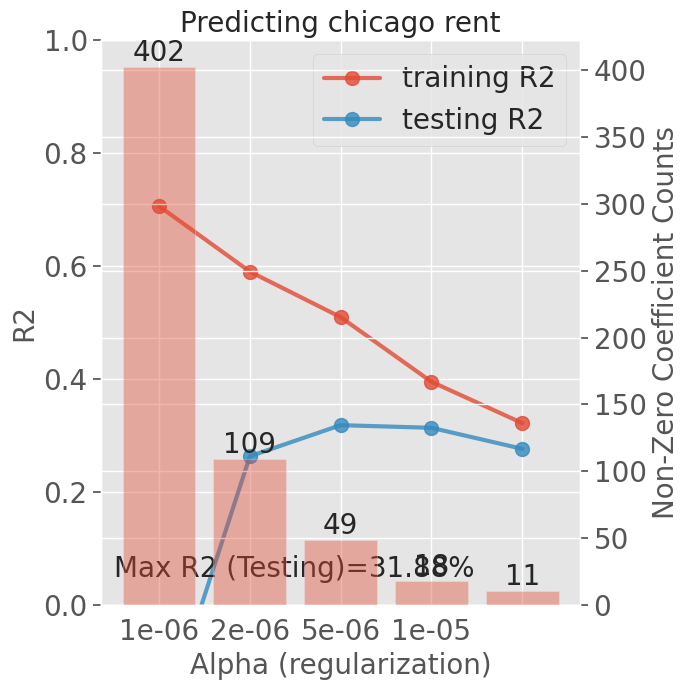

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


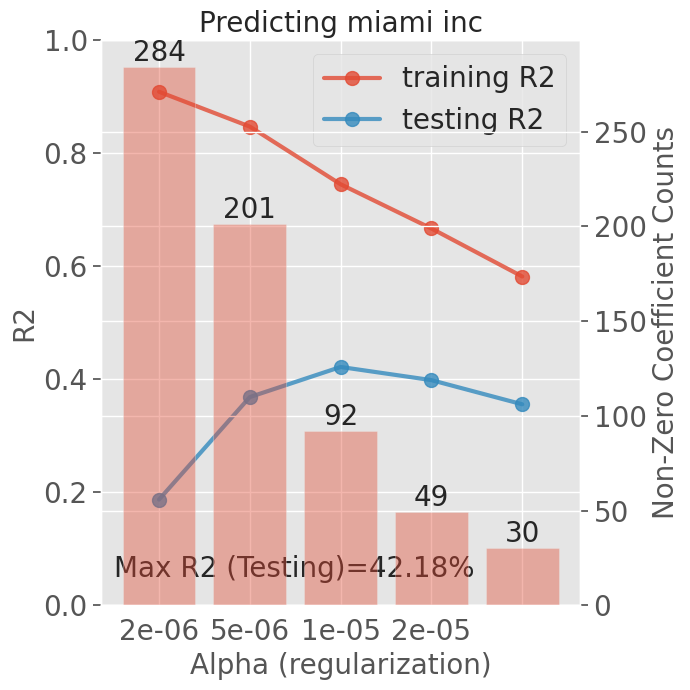

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


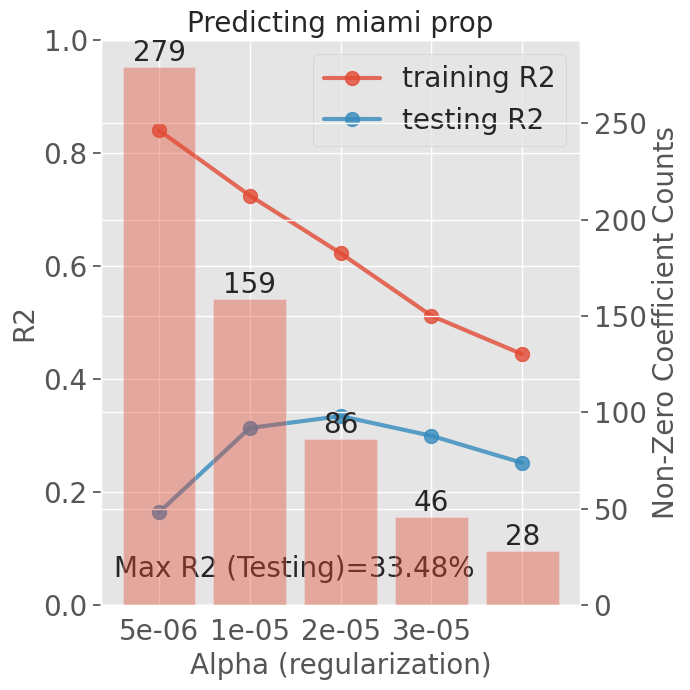

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


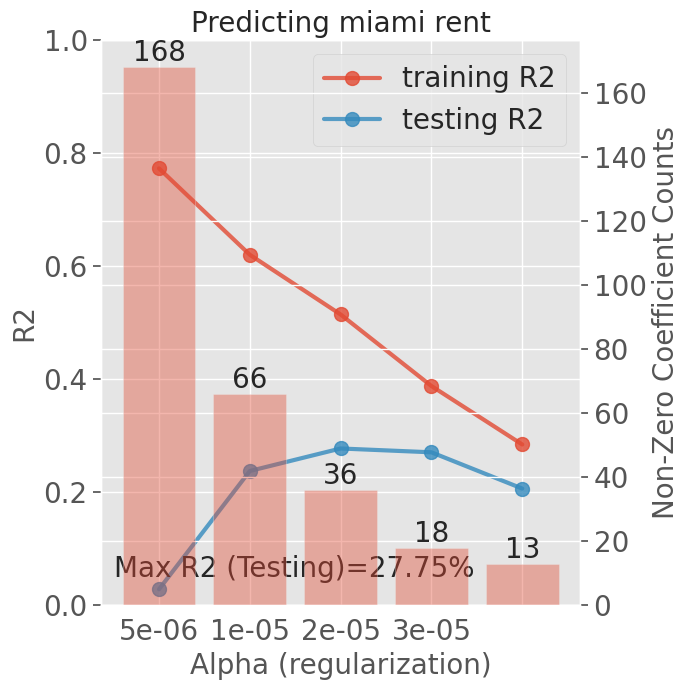

In [29]:
# choose the best model with the highest performance, expanding two units on the right and left. 
city_list = ['boston', 'chicago', 'miami']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
fun_type = 'lasso (no socio-demographics)'
figname_list = ['inc','prop','rent']

for city_idx in np.arange(3):
    city = city_list[city_idx]
    for output_idx in np.arange(3):
        output = output_list[output_idx]
        figname = 'lasso_performance_'+city+'_'+figname_list[output_idx]
        title = 'Predicting '+city+ ' ' +figname_list[output_idx]

        # set up the idx & performance
        max_col_idx = performance_dic[city][output][fun_type].loc['testing'].argmax()
        top_five_idx_list = [max_col_idx-2,max_col_idx-1,max_col_idx,max_col_idx+1,max_col_idx+2]
        max_testing_R2 = performance_dic[city][output][fun_type].loc['testing'].max()
        max_testing_R2 = str(np.round_(max_testing_R2*100, decimals = 2)) + '%'

        # set up 
        x_base = np.arange(5)
        x_label = list(performance_dic[city][output][fun_type].columns[top_five_idx_list])
        training_list = list(performance_dic[city][output][fun_type].iloc[0,top_five_idx_list])
        testing_list = list(performance_dic[city][output][fun_type].iloc[1,top_five_idx_list])
        count_list = list(performance_dic[city][output][fun_type].iloc[2,top_five_idx_list])
        legend_names = ['training R2', 'testing R2']

        # plot the figures
        plot_multiple_lines_ax(legend_names, x_base, x_label, training_list, testing_list, count_list, title, max_testing_R2, figname) 

